In [ ]:
Machine Learning for Time Series

Our goal in this chapter is to provide some real-life examples of how machine learning algorithms can be used in time series analysis. Despite its relative youth, this field has shown promise for successful applications. In this lecture, we'll discuss time series data machine learning techniques that weren't originally designed for time series data. Even though these models differ from those we discussed in previous chapters, they are still very useful.

Compared to the forecasting techniques discussed in previous chapters, machine learning represents a significantly different approach. To date, we have primarily used statistical models to predict time series data. Our models are based on theories about how data behave and uncertainties exist. Our ability to make predictions and gauge uncertainty is based on these theories. When we identified the model and estimated its parameters, we needed to carefully consider how to describe the dynamics of our data.

Now let's explore different approaches without assuming there's a specific process or set rules. It's more important to find patterns that help us understand and predict results, such as accurately labeling time series. The unsupervised learning of time series will also be explored, particularly clustering of time series.

Data classification can be achieved using tree-based methods and clustering. Tree-based methods require us to create features for our time series as part of the process. Unlike time-aware models like ARIMA, trees do not naturally incorporate time into their computations.

We can either use features to cluster data or use the original time series as input for distance-based classification. In this case, we can apply a distance metric called dynamic time warping to the time series itself. By using this metric, we can analyze the time series directly and retain all the chronological information in the data, rather than reducing it to a few features.

In [ ]:
Time Series Classification

You will learn how to convert raw electroencephalogram (EEG) time series data into features in this section. As a result, machine learning algorithms are able to use these features. To classify the EEG data, we will use decision tree methods after we extract these features.

In [ ]:
Selecting and Generating Features

We talked about features for time series data in the last chapter. Our discussion even included a short example of generating features with tsfresh. The second time series feature package we discussed earlier is cesium. Time series datasets will be enriched with its features.

With the cesium package, you can access a tons of useful time series data. EEG data from a 2001 study is one of those sets. You can find details on how the data were prepared in the paper if you're interested. Now let's look at how the EEG data set is divided into five categories. During continuous EEG readings, each category consists of segments of equal length. - EEGs from healthy people with their eyes open - EEGs from healthy people with their eyes closed - EEGs from people with epilepsy in the absence of seizures. Seizures don't occur in these two brain areas. Seizure-related EEG recordings.

The data is downloaded using a handy feature in Cesium.

In [ ]:
## python
>>> from cesium import datasets
>>> eeg = datasets.fetch_andrzejak()

Take a look at some examples before moving forward with the analysis. This will allow us to categorize these time series more clearly.

In [ ]:
## python
>>> plt.subplot(3, 1, 1)
>>> plt.plot(eeg["measurements"][0])
>>> plt.legend(eeg['classes'][0])
>>> plt.subplot(3, 1, 2)
>>> plt.plot(eeg["measurements"][300])
>>> plt.legend(eeg['classes'][300])
>>> plt.subplot(3, 1, 3)
>>> plt.plot(eeg["measurements"][450])
>>> plt.legend(eeg['classes'][450])

In Figure 9-1, we demonstrate the differences in EEG measurements between various classes. EEG plots reveal substantial variations, as they capture brain activity in diverse areas during different tasks, in individuals without epilepsy and those without.

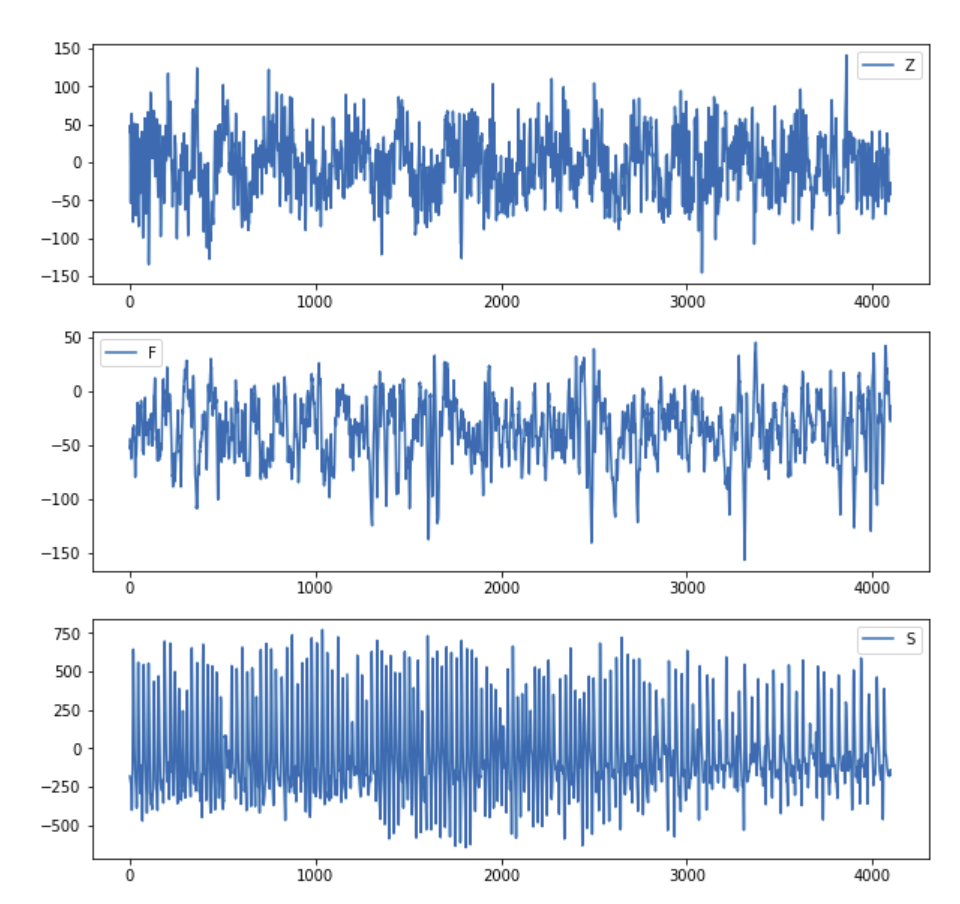

In [1]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.21.32 PM.png")

To analyze the EEG data set, we selected three random samples. These samples are not taken simultaneously from different parts of the same brain. Instead, each sample represents an individual patient and was taken at a different point in time.

The visualizations help generate new features in a really helpful way. Take for instance class Z and G - their data doesn't seem to be skewed as much as class S. Additionally, each class is represented by a diverse range of values in the y-axis. Therefore, an amplitude feature might be useful. However, it's not just about the average amplitude, but also about the overall distribution of points - and this is where the three classes really differ. These features along with others will be used as we continue our analysis. We will show you the code for generating these features in the next step.

Using Cesium, we generate the features.

In [ ]:
## python
>>> from cesium import featurize.featurize_time_series as ft
>>> features_to_use = ["amplitude",
>>>                    "percent_beyond_1_std",
>>>                    "percent_close_to_median",
>>>                    "skew",
>>>                    "max_slope"]
>>> fset_cesium = ft(times           = eeg["times"],
>>>                  values          = eeg["measurements"],
>>>                  errors          = None,
>>>                  features_to_use = features_to_use,
>>>                  scheduler       = None)


Using Jupyter notebooks, you can access our features (Figure 9-2).

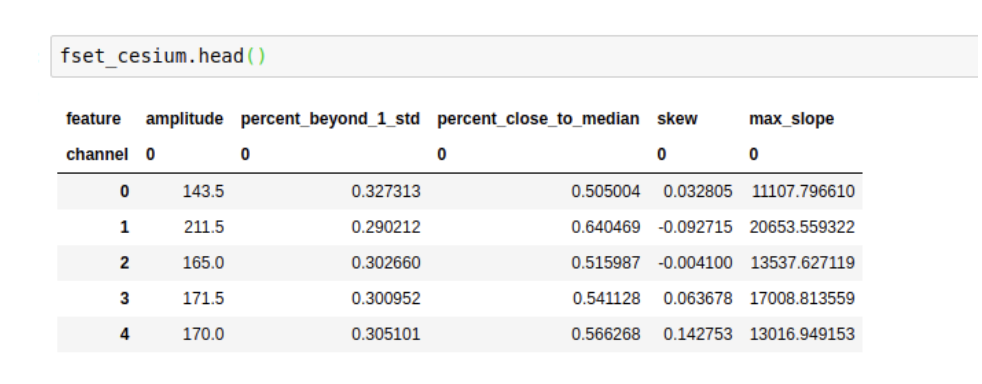

In [2]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.21.59 PM.png")

Below you will find the numerical values of the features we generated for the initial samples in our dataset.

Please note that some of these values have not been normalized. A technique requiring normalized inputs requires us to remember this.

The next step would be to ensure that we fully understand what Cesium calculates and that what we understand aligns with what our features show. In order to validate our reasoning, let's review the percent_beyond_1_std for a single sample. Here is an example of error checking and confirmation based on common sense.

In [ ]:
## python
>>> np.std(eeg_small["measurements"][0])
40.411
>>> np.mean(eeg_small["measurements"][0])
-4.132
>>> sample_ts = eeg_small["measurements"][0]
>>> sz = len(sample_ts)
>>> ll = -4.13 - 40.4
>>> ul = -4.13 + 40.4
>>> quals = [i for i in range(sz) if sample_ts[i] < ll or 
                                    sample_ts[i] > ul  ]
>>> len(quals)/len(ser)
0.327 ## this checks out with feature generated in Figure 9-2

If you use any features, you should be able to double-check them. The key is to approach analysis in a responsible manner. Ensure you never feed your algorithm with information you cannot understand, clarify, or confirm.

In [ ]:
Decision Tree Methods

People make decisions based on trees in a similar way. Considering different aspects and variables can influence our decisions, we take it one step at a time. Like a flow chart, we consider how each variable affects our decision and then move on to the next.

The following is a more humane version: "Check out Figure 9-3!" Using a decision tree, you can guess the weight of someone."

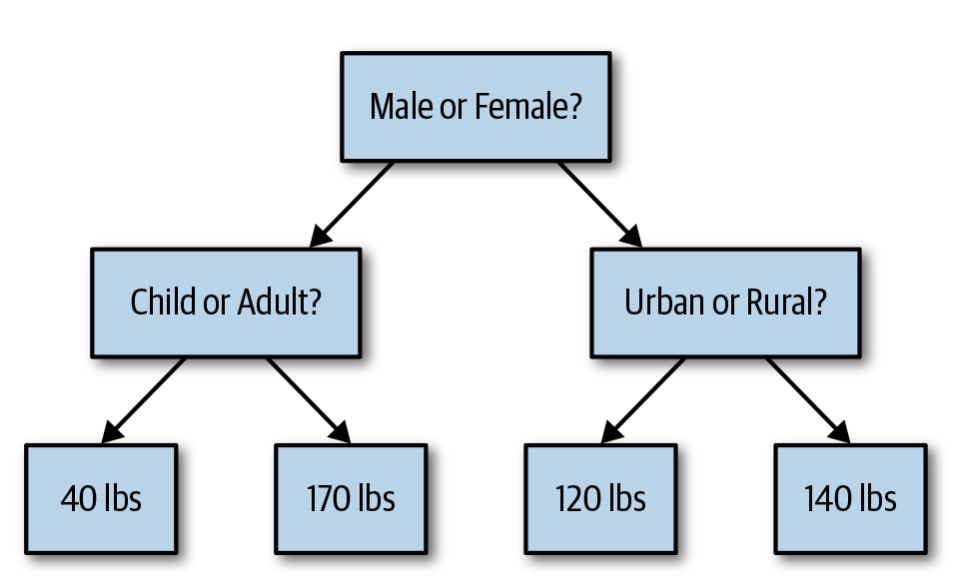

In [3]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.22.47 PM.png")

To estimate a person's weight, we use a set of logical pathways. In spite of its simple nature, this model illustrates how even a simple tree model can handle a regression problem in a flexible and adaptable manner.

As humans analyze time series data, they often behave similarly to decision trees. Let's say you're a discretionary stock market trader. It's not uncommon for them to use technical indicators, but they typically do so in a hierarchical sequence, like a tree. Their first step is to determine the direction of momentum based on one indicator, and then they take into account the evolving volatility over time. This nonlinear relationship is similar to a decision tree in that the answer to the latter question influences the answer to the former. Trading is likely to be based around a decision tree-like structure in traders' minds.

Generally, medical professionals begin by looking for one particular feature on an EEG or ECG before moving on to others. Methodically, they consider various factors. When one feature is present and the other is not, the diagnosis differs. In turn, the patient's prognosis also differs.

A gradient boosted tree and a random forest will be used to classify the EEG data based on the features we extracted. Inputs will be features generated from raw data and used in these classification methods.

In [ ]:
Random forest

Random forests are like decision trees that are grouped together instead of being isolated. Rather than relying on a single tree, we make classification or regression predictions using a combination of trees. In essence, it's like tapping into a collective wisdom, even if each tree isn't perfect. Often, combining all the trees outperforms a single, highly sophisticated decision tree.

Two experienced statisticians in 1969, J.M. As done by Bates and Clark. Using a collection of models to forecast was introduced by Granger. In their paper, titled "The Combination of Forecasts," the authors explained how combining two forecasts of airline passenger data can improve accuracy. At the time, this discovery was quite surprising and counterintuitive. It is now quite intuitive to the newer generation of analysts who are more familiar with machine learning than traditional statistics. Various forecasting problems can be solved with the random forest algorithm.

Creating a random forest requires setting certain parameters, such as the number of trees to train and their maximum depth. Data and features are randomly selected for training each tree. To avoid overfitting, we keep the trees relatively simple. As a result, the model can combine multiple general models, each not necessarily excellent individually, but together robust enough to prevent data distortion.

The input data for our model will be the calculated features obtained for each sample in the time series. There may be a reason why we don't use raw time series data. First of all, dealing with time series of different lengths is quite challenging, so that wouldn't be practical. Adapting the model for variations in data size can be challenging, causing design issues and computational challenges. Second, using raw time series data could result in a huge number of inputs, possibly even more than the total number of time steps. The models would thus be computationally expensive, both in terms of complexity and training time. The final point is that when no specific time step is important (since each time step corresponds to one feature), there will be a lot of noise and limited useful data to train the model. In decision tree models, each time step would be considered as a separate input, potentially diluting meaningful data.

When it comes to time series data, random forests can be a bit tricky. Using random forests to work with such data can actually prove quite beneficial when the data is compressed into summary features. The advantage of using random forests with time series data is that we can condense long and complex data into a small set of features while still maintaining high accuracy. As a result, not only is the data representation simplified, but it also helps reduce the computational resources needed for processing. In time series data analysis, overfitting is a common concern. Lookahead bias can exacerbate this problem by making it even more challenging to create accurate models. As a result of random forests, overfitting can be mitigated. As a result of their straightforward approach to modeling, we are less likely to see our model match the noise or anomalies in our training data too closely. Random forests are especially helpful when working with time series data for which no model or hypothesis already exists. The use of random forests makes them an effective tool for analyzing data when relationships between variables are complex without predetermined assumptions.

Typically, random forests are used to classify time series data instead of forecasting it. In the analysis of time series, gradient-boosted trees have proven very effective for both classification and forecasting.

In [ ]:
Gradient boosted trees

The boost method, also known as ensemble prediction, is a method that helps create a group of predictors. The goal of boosting is to build a set of models one after another, learning from the mistakes made by the previous model. Additionally, boosting highlights errors made by earlier models, allowing more effective correction as the process progresses.

As a result, gradient boosted trees have become the most popular method for boosting in the field of time series analysis. Several data science competitions have been won by them.

The XGBoost program builds one tree at a time. Each subsequent combination of trees should predict the residual errors resulting from previous combinations. To illustrate this, XGBoost aligns its initial tree directly with the provided data. In the next step, the tree predicts the actual value less the previous tree's prediction. By subtracting the first tree's predicted value and by using the residuals from the first tree, the second tree predicts the true value.

A model isn't just built endlessly, and the predicted error is minimized every time. A clever algorithm minimizes both accuracy and complexity using a loss function. The algorithm includes a penalty term that limits the number of trees that are created. Additionally, we can limit the number of trees that can be directly generated.

Time series data analysis has proven to be more successful using XGBoost than other machine learning methods in recent years. In various settings, such as Kaggle competitions and machine learning conferences, this phenomenon has been observed.

In [ ]:
Code example

In the case of random forests and XGBoost, it is often simpler to program a machine learning model as opposed to completely comprehending how it works. This example demonstrates training a random forest and a gradient boosted tree model on EEG data and classifying it using an derived feature set.

The training and testing sets are split using Sklearn.

In [ ]:
## python
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
     		fset_cesium.values, eeg["classes"], random_state=21)

First, let's try a random forest classifier. The ease of classifying our EEG data is amazing.

In [ ]:
## python
>>> from sklearn.ensemble import RandomForestClassifier
>>> rf_clf = RandomForestClassifier(n_estimators = 10, 
>>>                                 max_depth    =  3,
>>>                                 random_state = 21)
>>> rf_clf.fit(X_train, y_train)

The Classifier object can be used to determine the accuracy of non-example data.

In [ ]:
## python
>>> rf_clf.score(X_test, y_test)
0.616

A few lines of code enabled us to create a model that outperforms my own abilities as a non-medical classifier. As this model relies on feature selection, it only analyzes summary statistics from an EEG rather than the entire dataset.

As simple and concise as the XGBoost code.

In [ ]:
## python
>>> import xgboost as xgb
>>> xgb_clf = xgb.XGBClassifier(n_estimators    = 10, 
>>>                              max_depth    =  3,
>>>                              random_state = 21)
>>> xgb_clf.fit(X_train, y_train)
>>> xgb_clf.score(X_test, y_test)
0.648

According to our results, the XGBoost model performed slightly better than the random forest model. Additionally, it trains quicker than the other model, as demonstrated by this short experiment.

In [ ]:
## python
>>> start = time.time()
>>> xgb_clf.fit(X_train, y_train)
>>> end = time.time()
>>> end - start
0.0189

## Random Forest
>>> start = time.time()
>>> rf_clf.fit(X_train, y_train)
>>> end = time.time()
>>> end - start
0.027

This result represents a significant improvement, with XGBoost performing 50% faster than a random forest. XGBoost is shown to have an advantage, particularly when working with large data sets, although the test is not conclusive. Further confirmation is needed that this advantage also holds true for even bigger data sets with more examples.

We might wonder if something about our specific hyperparameters caused XGBoost to perform better than random forest models. What if we try simpler trees with less depth, for instance? Would it be possible to limit the number of decision trees in the model? Our test of these possibilities is quite simple, and once again we observe that XGBoost usually retains its advantage.

Gradient boosted models consistently achieve higher accuracy than random forest models if we use the same number of decision trees but reduce their depth.

In [ ]:
## python
>>> ## Test the same number of trees (10) but with less complexity
>>> ## (max_depth = 2)
>>> 
>>> ## XGBoost
>>> xgb_clf = xgb.XGBClassifier(n_estimators = 10, 
                             max_depth    =  2,
                             random_state = 21)
>>> xgb_clf.fit(X_train, y_train)
>>> xgb_clf.score(X_test, y_test)
0.616

>>> ## Random Forest
>>> rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth    =  2,
                                random_state = 21)
>>> rf_clf.fit(X_train, y_train)
>>> rf_clf.score(X_test, y_test)
0.544

Even if the structure of the tree is simplified even further, the same holds true:

In [ ]:
>>> ## Test the same number of trees (10) but with less complexity
>>> ## (max_depth = 1)

>>> ## XGBoost
>>> xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                                max_depth    =  1,
                                random_state = 21)
>>> xgb_clf.fit(X_train, y_train)
>>> xgb_clf.score(X_test, y_test)
0.632

>>> ## Random Forest
>>> rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth    =  1,
                                random_state = 21)
>>> rf_clf.fit(X_train, y_train)
>>> rf_clf.score(X_test, y_test)
0.376

This may be due to several reasons, including gradient boosted trees outperforming random forests. We are unsure if all the features we chose for classification are really helpful. As an example, gradient boosting (gradient boosted trees) may be better than bagging (random forest). As it uses the full range of features and gives preference to the relevant ones, boosting tends to disregard useless features. Additionally, some trees in bagging might use less significant features.

Combining the enhanced feature creation libraries with boosting may also be beneficial. In situations where you generate many time series features, boosting can act as a safety net to prevent extremely adverse outcomes.

In [ ]:
Classification versus regression

In our earlier discussion, we discussed random forests and gradient boosted trees as mechanisms for classifying time series data. Time series predictions can also be made with these same methods?

According to some experts, traditional statistical analysis was just as effective as machine learning for forecasting. However, gradient boosted trees have gained popularity and often outperform traditional models in forecasting competitions and real-world applications, provided the data set is large enough. Obtaining these results requires preparing time series features and fine-tuning the model's parameters.

With gradient boosted tree models, irrelevant and noisy features are automatically filtered out. The objective is to focus on the most important features, bringing them close to an "autopilot" mode. In spite of this, relying solely on the tendency won't guarantee state-of-the-art performance. The quality of the output of gradient boosted trees depends on the input quality, even though they appear automatic. Input features that are of high quality and well-tested will enhance your model's performance.

It is possible to improve the current model in a number of ways. XGBoost's feature importance metrics can help us determine which features are useful and which aren't. Once we have a dataset with similar features, we can add more to it. A hyperparameter grid search can also be conducted to optimize the model's parameters. Having a look at the raw time series of mislabeled data is another way to see if the current set of features capture any patterns. Therefore, we can add features that better describe the mislabeled data, thereby enhancing our inputs.

In [ ]:
Clustering

Data clustering consists of finding groups of data points with meaningful connections. Time series data and other types of data can be analyzed using the same concept.

I assume you have some understanding of non-time series related machine learning concepts after our previous discussion. You may wish to do some quick background reading on clustering before beginning this section if you are unfamiliar with it.

When analyzing time series data, clustering is a useful tool for classification and forecasting. As part of the training phase, clustering algorithms can be employed to determine the number of clusters that should be used. Therefore, we can define different types of time series and identify new samples easily.

To make predictions, we can either use pure clustering techniques or take inspiration from clustering by using relevant distance metrics. Using clustering and related techniques, forecasts can be generated for a particular time period, denoted as "h." We need to take into account that in this scenario, we don't have complete observations of the time series but only the initial N steps, from which we want to predict its value at time step N + h. A few possible approaches can be considered in this situation.

Class membership is one way to make forecasts. Time series samples are grouped based on their initial N time steps, and their future behavior is predicted using this membership. In particular, we observe a change in values between Nth and N + h time steps for time series inside a group. For avoiding peeking into the future, you should only apply the clustering process to the first N steps of time series, not to the entire series.

By analyzing previous data points, it is also possible to predict how similar data points will behave in the future. Our first step is to look at the first few time steps and find the closest matches in terms of their overall patterns. We can predict the current value by observing similar data points over a longer period of time.

Both classifying and predicting involve identifying how similar the time series are. The measurement of similarity in complex problems has been subjected to a lot of effort, and different methods can be used to group similar data together. When comparing two blood samples or two job applicants, how do we measure their similarity? Time series data are also subject to these challenges.

Using clustering techniques on time series data, we can choose between two main distance metrics.

A data series can be analyzed for distance by treating each feature as a point. In considering a distance metric for the data, this is not a complete solution, but it simplifies the problem to a distance metric challenge common to all datasets.

My expertise will be able to help you measure the "closeness" between different time series. Time series samples from different time scales, with varying measures, and with different sample sizes should be handled by this method.

Time series data will be used for both distance metrics. This dataset represents the transformation of a 2D image into a 1D time series based on a handwritten word.

In [ ]:
Generating Features from the Data

We've already talked about how to choose features and how to create them. Now let's look at how to measure the similarity between data sets by evaluating the distance between their features.

Time series that are uninteresting or unimportant should have already been filtered out. The most important features can be determined by using a tree. Whenever we calculate distances between time series, we want to ignore these irrelevant components. There may be no relevant similarities between two time series if the features between them are different, even though these characteristics can lead to false indications of differences.

We'll start our analysis by taking a look at some examples of class, just like we did with the EEG data set. In terms of its overall structure, we can observe any noticeable changes over time.

Our data come from the FiftyWords dataset available in the UEA and UCR Classification Repository. Researchers studying the handwritten letters in historical documents published this particular data set in 2003. By converting the 2D image of a handwritten word into a 1D curve, regardless of the word's length, they created a clever technique called "word profiles". We are applying the same principles, although our data set is slightly different from that described in the paper. Initially, the research was conducted with the aim of creating an easy method for digitally labeling words that were similar or identical. Nowadays, technological advancements like neural networks enable this task to potentially be automated.

A sample profile for word projection is shown below. Projections are used to convert images from a 2D into a 1D format. Because the order of the words matters, this one-dimensional space lends itself to time series analysis. Although the "time" axis does not represent time but rather the progression of written words from left to right, the concept remains exactly the same - equal spacing and order. Although it may not be completely accurate, I will refer to it as time and temporal when analyzing it. In our case, there is no distinction.

By analyzing this data, and especially by taking into consideration the patterns that are evident on the plots, we can begin to identify certain aspects to investigate. In addition to the heights and positions of the peaks, we can also look at how steep they rise and their top shape.

In Figure 9-4, several types of words are illustrated through examples.

The characteristics I am discussing may begin to resemble features associated with image recognition rather than time series characteristics. A feature generator can benefit from this perspective. We can often process and comprehend visual data much more easily than time series data, so we can benefit from thinking in terms of images. In addition, it demonstrates how difficult generating features can be. The coding process may differ from the analysis of the time series in some cases. Additionally, we may be able to write the code, but it might be time-consuming.

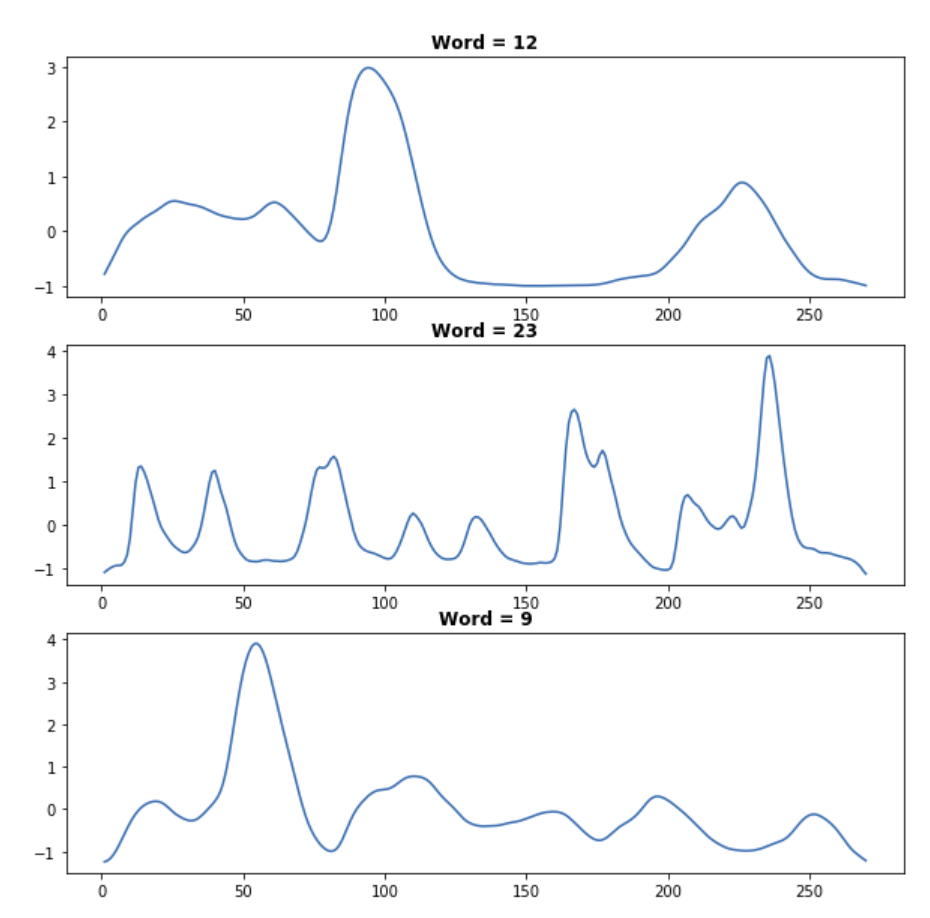

In [4]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.25.49 PM.png")

It is clear to see that three different projection profiles (12, 23, and 9) have distinct characteristics. It is possible to distinguish these words from each other based on certain characteristics, including the location in time (x-axis) of the highest peak or the second highest peak, the number of smaller peaks, the range of values, and the curve's average curvature.

In the past ten years, deep learning has proven to be the most powerful technique for classifying images. Using deep learning algorithms, we can train a classifier specifically for these plots if we have enough data (Chapter 10 gives more details). In order to overcome programming challenges, it is worthwhile to consider alternative approaches. It would be challenging to generate features that accurately identify each peak, since this requires complex code and an artistic eye.

Another option is using a one-dimensional histogram, either of all examples in a class or of just one of them. A time series analysis can help us identify key points and find values that represent the overall patterns we observe. Fig. 9-5 shows the same individual class members as before, but now they also have corresponding histograms.

In [ ]:
## python
>>> plt.subplot(3, 2, 1)
>>> plt.plot(words.iloc[1, 1:-1])
>>> plt.title("Word = " + str(words.word[1]), fontweight = 'bold')
>>> plt.subplot(3, 2, 2)
>>> plt.hist(words.iloc[1, 1:-1], 10)
>>> plt.subplot(3, 2, 3)
>>> plt.plot(words.iloc[3, 1:-1])
>>> plt.title("Word = " + str(words.word[3]), fontweight = 'bold')
>>> plt.subplot(3, 2, 4)
>>> plt.hist(words.iloc[3, 1:-1], 10)
>>> plt.subplot(3, 2, 5)
>>> plt.plot(words.iloc[5, 1:-1])
>>> plt.title("Word = " + str(words.word[11]), fontweight = 'bold')
>>> plt.subplot(3, 2, 6)
>>> plt.hist(words.iloc[5, 1:-1], 10)

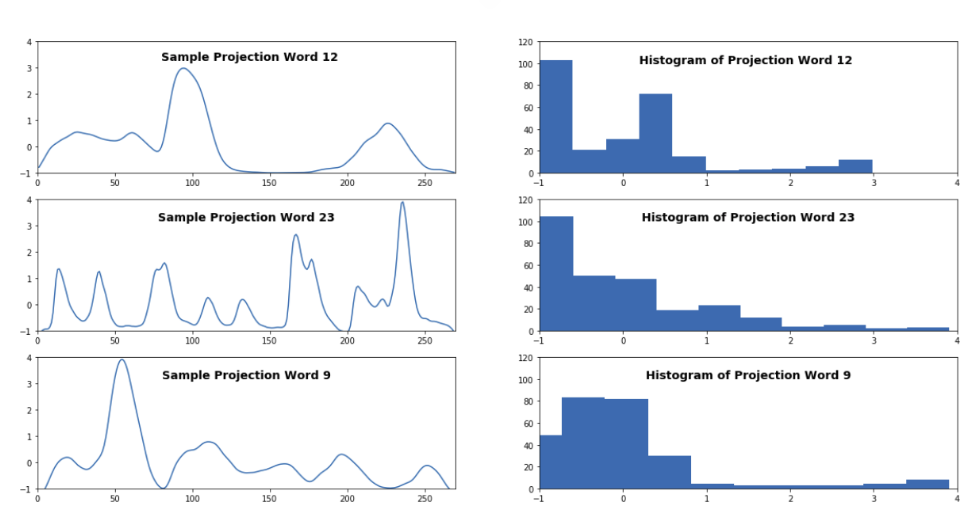

In [5]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.26.11 PM.png")

Identifying valuable features of classes is another way to assess classes. According to the histogram of each class example, certain characteristics of the histogram, such as the number of local peaks, the asymmetry, and its shape, could be used to represent some aspects of the time series curves that humans can observe but are hard to program.

It is also important that the examples we are examining do not differ significantly from the other examples. The second objective is to understand the range of variation between individuals by creating a 2D histogram for two words (Figure 9-6).

In [ ]:
## python
>>> x = np.array([])
>>> y = np.array([])
>>> 
>>> w = 12
>>> selected_words = words[words.word == w]
>>> selected_words.shape
>>> 
>>> for idx, row in selected_words.iterrows():
>>>     y = np.hstack([y, row[1:271]])
>>>     x = np.hstack([x, np.array(range(270))])
>>>     
>>> fig, ax = plt.subplots()

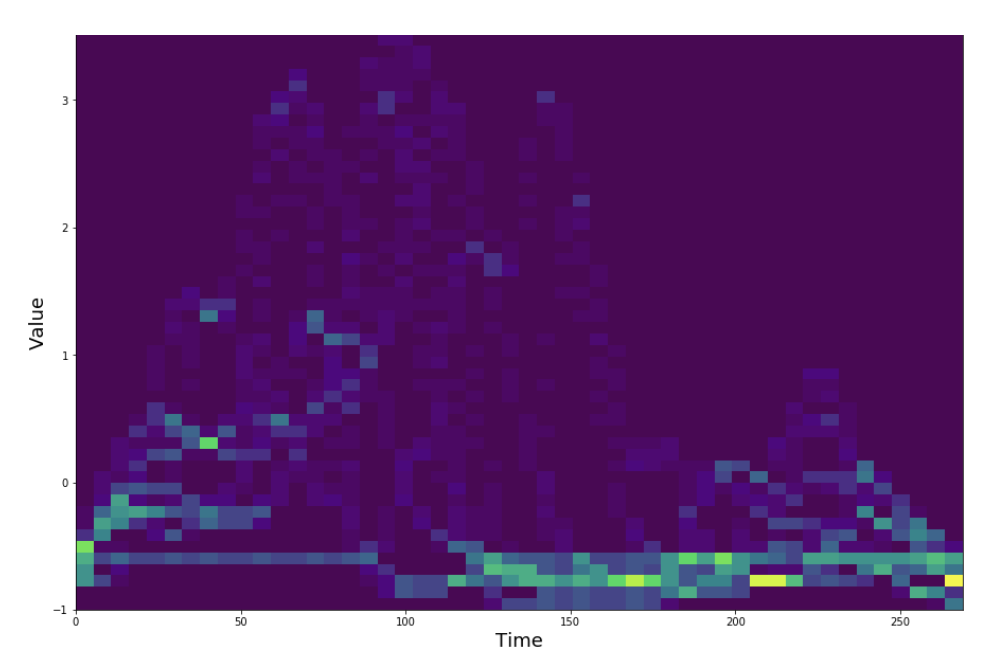

In [6]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.26.27 PM.png")

In this graph, we can see the distribution of 12 word projections. Each time step is represented on the y-axis, while each word projection is represented on the x-axis.

A 2D histogram representing members of the dataset with word = 12 is shown in Figure 9-6. Observing Figure 9-5, we can see two prominent peaks in each curve, which suggest they play a significant role in the series. We can see, however, that most of these peaks are separated by a flat region in this histogram. There seems to be a span of time between 120 and 200, based on the higher concentration of points in that area. This 2D histogram can also be used to determine a maximum peak cutoff point. Within time steps 50 to 150, the peak seems to be located differently. It might be useful to determine whether the maximum value falls between 50 and 150 points.

Our objective was further supported by creating a second 2D histogram. In Figure 9-5, we identified multiple small bumps in word class 23 in the previous example. According to Figure 9-7, this particular feature was difficult to quantify accurately.

To maintain a human tone, here's a rewrite: The graph shows a visual representation of the word projections for word 23. There are 270 time steps for each sample/word projection on the x-axis, while the values of each time step are represented on the y-axis.

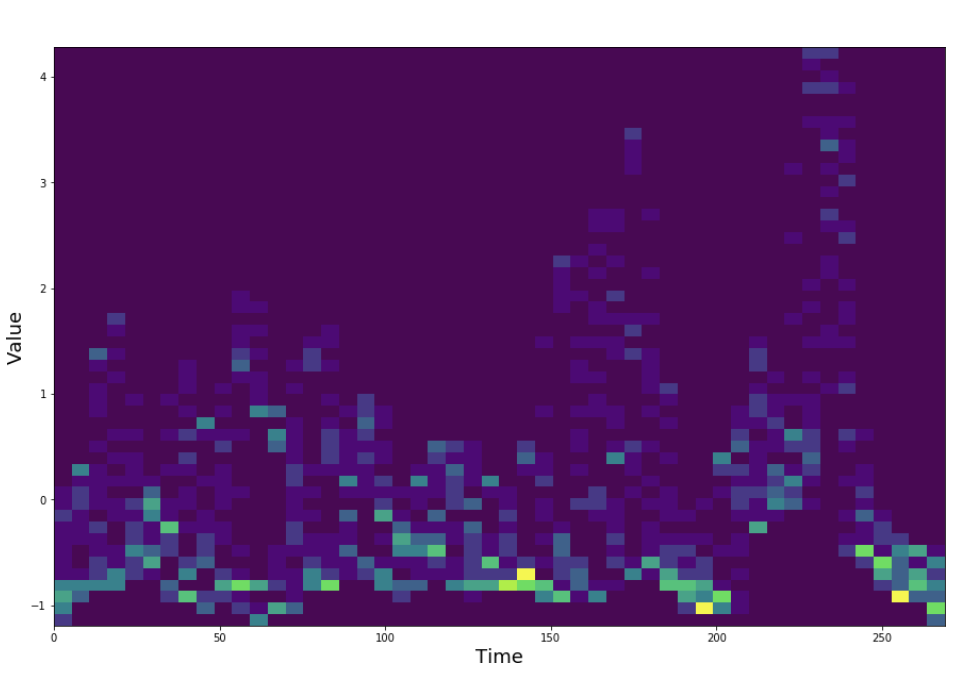

In [7]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.26.46 PM.png")

The histogram in Figure 9-7 clearly displays a rather smeared distribution for word class 23. Even the example plotted in Figure 9-5 had numerous features, resulting in less than perfect alignment of the features around samples, causing smearing in the 2D histogram. Comparing word class 23 to word class 12, we find that maximum point values occur at different intervals of time. There are 150 time steps before the maximum value appears in this class. Previously, we observed two significant peaks within this range. A 2D histogram supports this observation, showing that the earlier peak is smaller than the later peak. In order to differentiate this class of time series from others, alternative ways of quantizing its shape may be helpful.

In 2D histograms, we see how much a particular characteristic varies within a group. We can avoid making decisions based on only one example by considering the larger picture instead.

Our decision here is to create features based on the word projection's shape, and another set based on the word projection's histogram shape. As can be seen in the 2D histograms, there are peaks in the data, but their placement is unconsistent. The histogram is used to determine a unique shape for each word projection, allowing us to achieve a more reliable and characteristic representation over the word projection alone. Because the peaks in the projections do not have stable temporal locations within the time series, histograms provide information about the values present in a series without specifying their specific positions.

Initially, we create time series features composed of 270 time steps. To make understanding easier, we abbreviated the name of the function that generates features.

In [ ]:
from cesium import featurize.featurize_time as ft

In [ ]:
## python
>>> word_vals      = words.iloc[:, 1:271]
>>> times          = []
>>> word_values    = []
>>> for idx, row in word_vals.iterrows():
>>>     word_values.append(row.values)
>>>     times.append(np.array([i for i in range(row.values.shape[0])]))
>>> 
>>> features_to_use = ['amplitude',
>>>                    'percent_beyond_1_std',
>>>                    'percent_close_to_median']
>>> featurized_words = ft(times           = times,
>>>                       values          = word_values,
>>>                       errors          = None,
>>>                       features_to_use = features_to_use,
>>>                       scheduler       = None)

Afterwards, we create histograms and convert them into another time series. Additions to this series can then be generated.

In [ ]:
## python
>>> ## create some features derived from histogram
>>> times = []
>>> hist_values = []
>>> for idx, row in words_features.iterrows():
>>>     hist_values.append(np.histogram(row.values, 
>>>                                     bins=10, 
>>>                                     range=(-2.5, 5.0))[0] + .0001) 
>>>                                    ## 0s cause downstream problems
>>>     times.append(np.array([i for i in range(9)]))
>>> 
>>> features_to_use = ["amplitude",
>>>                    "percent_close_to_median",
>>>                    "skew"
>>>                   ]
>>> 
>>> featurized_hists = ft(times           = times,
>>>                       values          = hist_values,
>>>                       errors          = None,
>>>                       features_to_use = features_to_use,
>>>                       scheduler       = None)

We ensured all histograms have the same number and range of values. The necessary parameters are passed to np.histogram(). The histograms have the same range of values, allowing them to be compared directly. When these histograms are used for time series feature generation, this common range will serve as the "temporal" axis. It is impossible to compare different histograms without consistency in the generated features.

Finally, we combine these two sets of features.

In [ ]:
## python
>>> features = pd.concat([featurized_words.reset_index(drop=True), 
>>>                       featurized_hists], 
>>>                       axis=1)

In [ ]:
Temporally Aware Distance Metrics

The selection of a distance metric is an important step in clustering analysis. In addition to the time series features we just used, we can also use various distance metrics to perform clustering analysis. Taking a quick detour to read up on distance metrics in these cases might be useful if you're not familiar with them.

By creating a way to compare time series, we will be able to measure their similarity. In order to accomplish this, dynamic time warping (DTW) is a popular method. In our word projection data, we need DTW to group time series that have similar shapes.

In this technique, time series are aligned along timelines by using temporal "warping," making it easier to compare shapes. Here is Figure 9-8, which should give you a better idea of how it works. In this figure, the temporal axis (x) is adjusted to find the best alignment of points between the two curves shown (representing two time series) so that their shapes can be accurately compared.

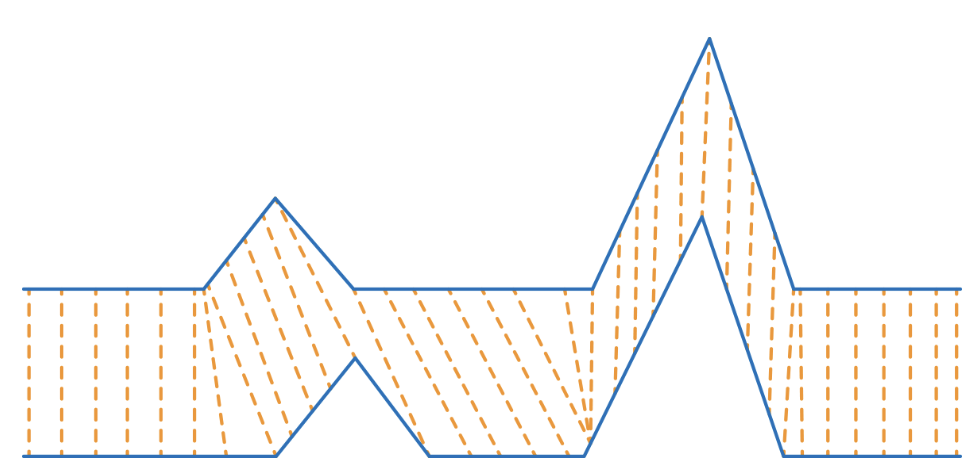

In [8]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-27 at 1.28.54 PM.png")

That's fine! This text can be rewritten more human-friendly as: Dynamic time warping matches corresponding points in two time series. This doesn't require a strict one-to-one mapping, though. First of all, the time series being compared can be measured in different time periods or even have different lengths. There is more to consider than just the overall shape. Secondly, time does not necessarily have to move forward during the matching process, and it does not always progress at the same rate for each time series. "Time moving" means progressing along the x-axis. Thanks for reading this explanation, I hope it has been helpful and simpler to understand than the original!

A curve's specific value is not important in this algorithm. A time series measured in nanoseconds could not be compared to one measured in millennia. Algorithms compare the curves' visual "shape" rather than the actual amount of time passing. In actuality, the concept of "time" is a set of evenly spaced points along an axis, rather than a literal definition.

Dynamic Time Warping (DTW) is based on the following principles:  1. At least one point from each of the two time series must match the point in the first time series. All data points from both series are compared, allowing us to determine how they are similar and different. The second principle All time series should have the same first and last indices. A comparison of the two series, starting and ending at the same time, is ensured. The third point. Keeping the forward progression of time in mind when aligning the points is important. Consequently, points from one series cannot be matched with points from another. Events cannot be reversed, just as time cannot be rewinded. Time doesn't always proceed in a linear fashion. We may compress two consecutive time steps during the warping process so they align with a single point on the x-axis. One example of this can be seen in Figure 9-8. It shows the first "kink" in the upper curve.

For the temporal alignment to comply with these rules, there are several options, but the most effective one minimizes the distance between the curves. It is usually measured by adding up the absolute differences between matched points, or the cost function. The cost function calculates the discrepancy between the points' values.

With DTW's basic concept understood, let's take a look at its code.

In [ ]:
## python
>>> def distDTW(ts1, ts2):
>>>     ## this is setup
>>>     DTW={}
>>>     for i in range(len(ts1)):
>>>         DTW[(i, -1)] = np.inf
>>>     for i in range(len(ts2)):
>>>         DTW[(-1, i)] = np.inf
>>>     DTW[(-1, -1)] = 0
>>> 
>>>     ## this is where we actually calculate the optimum
>>>     ## one step at at time
>>>     for i in range(len(ts1)):
>>>         for j in range(len(ts2)):
>>>             dist = (ts1[i] - ts2[j])**2
>>>             DTW[(i, j)] = dist + min(DTW[(i-1, j)],
>>>                                      DTW[(i, j-1)], 
>>>                                      DTW[(i-1, j-1)])
>>>             ## this is an example of dynamic programming
>>> 
>>>     ## once we have found the complete path, we return 
>>>     ## the associated distance
>>>     return sqrt(DTW[len(ts1)-1, len(ts2)-1])

Dynamic programming, which is a well-known technique, is needed to solve this problem, as mentioned in the comments. Dynamic programming problems such as the DTW distance are often used to demonstrate how the DTW distance worked. The solution lies in taking each time series step-by-step, starting at the beginning and working our way through until the end. By leveraging our previous knowledge along the way, we can make smarter decisions and build on our solution.

A number of implementations of DTW are available, each offering different strategies to efficiently find the best or near-best solution. Particularly when dealing with large datasets, these options are worth exploring.

Other methods exist for determining the distance between time series. Here are a few of them:

It is the maximum distance between two curves as they move along their paths that is defined as a Fréchet distance. Walking the dog with its owner is separate, but they are connected by a leash. There are curves to follow for both the owner and the dog on their respective journeys. It doesn't matter how fast they walk as long as they keep moving forward. It's not necessary to keep up with the owner - the dog can run ahead or walk slowly. Historically, the Fréchet distance was defined as the longest length of a leash that allowed both trainer and dog to move efficiently along their paths. In this case, however, they must find the best path. It is the shortest leash that represents the longest distance traveled during their journey, which is the greatest difference between the two curves.

A Pearson correlation coefficient measures the similarity between two sets of data over time. The metric uses correlation coefficients to maximize the "distance" between the two sets, unlike traditional distance metrics. If the correlation coefficient is close to 1, then there is a stronger relationship between the two sets, which means that a smaller "distance" exists. It is fairly straightforward to calculate Pearson correlations. It does, however, require that both sets have equal numbers of data points or that one set is adjusted to match the other set's number of points. Comparisons between the elements will be fair as a result. Computationally, Pearson correlation has a time complexity of O(n), which makes it highly efficient. With this approach, large datasets can be processed without using a great deal of computational power.

For comparing time series, the longest common subsequence is commonly used. The method is well suited to categorical and integral values in sequences. Similarity between two series is determined by the longest consecutive set of values that are exactly the same, no matter what position they are in the series. By looking for patterns of similarity instead of their exact timing, this method identifies patterns of similarity. It's important to note that, unlike DTW, the time series need not always have the same length. The edit distance measures the number of changes necessary to make one time series identical to another. Using this value as a distance metric is also possible.

When you're looking for a simple and suitable solution, being creative can really help. Make sure you understand what you need and describe it precisely. Check out the following example from Stack Overflow. Several people have asked how they can measure distances for time series data. Following patterns identified in a previous analysis, they wanted to classify these time series into three groups:  1. It is a straight line. Assume the following: It begins with a peak, followed by a straight line. The third. The rest of the line is straight, except for a peak at the end. According to the person, Euclidean distance and Dynamic Time Warping did not produce the results they were looking for. It was particularly forgiving with Dynamic Time Warping. As long as it had a peak, any time series with a peak was just as similar to one with a peak at the beginning as it was to one with a peak at the end. The Dynamic Time Warping solution was not always the best solution, even though it took a long time to calculate.

An intelligent commenter suggested improving distance metrics. In place of comparing original time series, they propose comparing cumulative summed time series instead. It is true that both Euclidean and DTW distances correctly ranked the time series with a peak at the beginning as having the smallest distance to a class' prototype when using this transformation. The prototypes at the beginning and end of a time series used to be at equal distances. Similarly, we have shown that transforming data can make ARIMA appropriate regardless of whether the raw data meets the criteria.

Choosing the best distance metric cannot be automated. A few important factors must be balanced in your judgment. First and foremost, it is important to keep computation resources efficient. A computationally efficient metric is particularly important when dealing with large datasets or situations that require immediate analysis. In order to develop a metric that is relevant to your specific goals, you should first choose the features that are most relevant to you. Your time series analysis should highlight and capture the most relevant aspects of the time series data, so that you can generate meaningful and useful data. It's important that your distance metric aligns with your assumptions, strengths, and weaknesses. Rather than minimizing pairwise distances, K-means clustering minimizes variances. Usually, Euclidean distance would be the best distance metric in such cases. Distance metrics must be compatible with the data analysis technique you choose to ensure consistent and meaningful results.

In [ ]:
Clustering Code


The final step we will take is to actually cluster the data once we have discussed how to generate features for clustering analysis as well as how to measure distance between time series. To compare the results, we will use the features we selected and pairwise DTW distance matrix.

In [ ]:
Hierarchical clustering of normalized features

Both the original recording and the histogram of the time series are calculated as time series. We normalize these features using a feature-based clustering procedure to ensure proper comparison.

In [ ]:
## python
>>> from sklearn import preprocessing
>>> feature_values = preprocessing.scale(features.values)

A hierarchical clustering algorithm has been chosen and 50 clusters have been found using it. The objective of this analysis is to match the 50 words in our dataset with these clusters.

In [ ]:
## python
>>> from sklearn.cluster import AgglomerativeClustering
>>> feature_clustering = AgglomerativeClustering(n_clusters = 50, 
>>>                                              linkage    = 'ward')
>>> feature_clustering.fit(feature_values)
>>> words['feature_labels'] = feature_clustering.fit_predict(p)



Moreover, we are interested in examining whether the clusters, which are labeled arbitrarily based on the original word labels, exhibit any meaningful correlations.

In [ ]:
## python
>>> from sklearn.metrics.cluster import homogeneity_score
>>> homogeneity_score(words.word, words.feature_labels)
0.508

Our data is labeled in this case, which makes it easier for us to avoid drawing incorrect conclusions from our clustering. Fewer than half of the clusters have a strong relation to a single word. Our analysis only considered six features, which is relatively few, so we can consider several strategies to improve our results. By including more features, we might be able to uncover patterns in the data that we had missed before. Another approach would be to look for features with low correlation. We did not consider this aspect in our analysis. By including features with low correlation, our model can be able to differentiate and classify data more effectively. In addition, we may have overlooked some features that could be useful. Our initial visual exploration of the data revealed some attributes we had missed, such as peak number and location. We should consider incorporating this information into our analysis or finding an appropriate proxy. Last but not least, we should investigate different distance metrics, including those that assign more weight to some features that humans find visualizing data most valuable. Adjusting the weights could potentially improve the clustering model.

Did you know that hierarchical clustering can be done using DTW distance matrices?

With time series clustering, we have completed the challenging part of direct clustering. As a result, we calculated the pairwise distance matrix through DTW. We saved the results in case we need to review them again in the future.

In [ ]:
## python
>>> p = pairwise_distances(X, metric = distDTW)
>>> ## this takes some time to calculate so worth saving for reuse
>>> with open("pairwise_word_distances.npy", "wb") as f:
    np.save(f, p)

After acquiring them, we can use a hierarchical clustering algorithm.

In [ ]:
## python
>>> from sklearn.cluster import AgglomerativeClustering
>>> dtw_clustering = AgglomerativeClustering(linkage   = 'average',
>>>                                         n_clusters = 50, 
>>>                                         affinity   = 'precomputed') 
>>> words['dtw_labels'] = dtw_clustering.fit_predict(p)

Finally, let's compare how well our clusters match the known labels, just like we did before.

In [ ]:
## python
>>> from sklearn.metrics.cluster import homogeneity_score, 
>>>                                     completeness_score
>>> homogeneity_score(words.word,  words.dtw_labels)
0.828
>>> completeness_score(words.word, words.dtw_labels)
0.923

Clustering DTW-based outperforms feature-based clustering, as we have observed. If you run DTW distance computation on your own computer, especially if it's a regular laptop, you'll see how much longer it takes compared to the features we selected. Although we could improve feature-based clustering, the computed DTW distance clustering isn't straightforward to improve. As alternatives for improvement, we suggest:  1. Along with DTW distance, incorporate features. Combining the features with the DTW distance is difficult both from a coding perspective and from a conceptual standpoint. As for two, You can also experiment with other distance metrics. Based on your data, objectives, and downstream analysis, the appropriate distance metric will be determined. DTW would be an appropriate metric if we defined our objectives for the word analysis more precisely and geometrically.